# Kaggle Titanic survival - learning curves

In [1]:
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/t_data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [3]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
# We drop passenger ID as it is not original data

data.drop('PassengerId', inplace=True, axis=1)

In [4]:
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'

## Standardise data

In [5]:
def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

## Calculate the maximum training set size we can use 

In [6]:
test_fraction = 0.25 # Use 25% of data for testing
data_rows = X.shape[0]
max_training_size = int(data_rows * (1 - test_fraction))
print('Max training size: {}'.format(max_training_size))

Max training size: 668


## Loop through increasing training set sizes 

In [7]:
# Set up list to collect results
results_training_size = []
results_accuracy = []

for train_size in range(10, max_training_size, 10):
    replicate_accuracy = []
    for replicate in range(10):
        # Split data into training and test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = test_fraction)

        # Reduce training set size (use np random choice for random index values)
        selection_index = np.random.choice(
            max_training_size, train_size, replace=False)
        X_train = X_train.iloc[selection_index]
        y_train = y_train.iloc[selection_index]

        # Standardise
        X_train_std, X_test_std = standardise_data(X_train, X_test)

        # Fit model
        model = LogisticRegression(solver='lbfgs')
        model.fit(X_train_std,y_train)

        # Predict test set
        y_pred_test = model.predict(X_test_std)

        # Get accuracy and record results
        accuracy = np.mean(y_pred_test == y_test)
        replicate_accuracy.append(accuracy)
    
    results_accuracy.append(np.mean(replicate_accuracy))
    results_training_size.append(train_size)

## Plot learning curve

We will plot the learning curve, including a moving average (the mean of 5 points). Moving averages can help show trends when data is noisy.

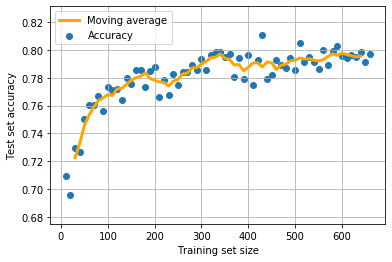

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate moving avergae (of last 5 points) with np.convolve
moving_average = np.convolve(results_accuracy, np.ones((5,))/5, mode='valid')
x_moving_average = results_training_size[2:-2] # Include offset to centre mean

plt.scatter(results_training_size, results_accuracy, 
         label='Accuracy')

plt.plot(x_moving_average, moving_average,
        label='Moving average',
        color='orange',
        linewidth=3)

plt.xlabel('Training set size')
plt.ylabel('Test set accuracy')
plt.legend()
plt.grid(True)
plt.show()